In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=Warning)

In [2]:
# load data
df = pd.read_csv("Article_top_Data.csv")
# group by Date
df['Day'] = df['Date'].map(lambda x: 1 if len(pd.bdate_range(x, x)) else 0 )

# group by Hour
df['Hour'] = df['Hour'].map(lambda x: 0 if int(x)>=5 and int(x)<=8
                                            else 1 if int(x)>=9 and int(x)<=12
                                            else 2 if int(x)>=13 and int(x)<=16
                                            else 3)

# # group month by seasons
# df['Month'] = df['Month'].map(lambda x: 0 if int(x)>=3 and int(x)<=5 
#                                             else 1 if int(x)>=6 and int(x)<=8 
#                                             else 2 if int(x)>=9 and int(x)<=11
#                                             else 3)

# # add temperature for each seasons
# df.loc[(df.Month==0), 'Temp'] = 2.28
# df.loc[(df.Month==1), 'Temp'] = 8.9
# df.loc[(df.Month==2), 'Temp'] = 19.57
# df.loc[(df.Month==3), 'Temp'] = 10.06

df.head()

,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Timestamp,Month,Day,Hour,Group
0,4,2022-01-03,1001,1,296,5,09:21:14,419727,"GL H-Milch 3,5% 1L VLOG",1.0,2022-01-03 09:21:14,1,1,1,Milch
1,6,2022-01-03,1001,1,296,7,09:21:14,999999998025,Pfandartikel (Tandem) - EW,1.0,2022-01-03 09:21:14,1,1,1,Pfandartikel
2,7,2022-01-03,1001,1,296,8,09:21:14,435066,Schlaufentragetasche ST,1.0,2022-01-03 09:21:14,1,1,1,Schlaufentragetasche ST
3,19,2022-01-03,1001,1,300,1,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,1,1,BO-Laugenbreze 1ST
4,20,2022-01-03,1001,1,300,2,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,1,1,BO-Laugenbreze 1ST


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso

from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [4]:
# encoder = LabelEncoder()
# df['StoreNumber'] = encoder.fit_transform(df['StoreNumber'])
# store_mapping = {index : label for index, label in enumerate(encoder.classes_)}
# print(store_mapping)

# df['ArticleName'] = encoder.fit_transform(df['ArticleName'])
# article_mapping = {index : label for index, label in enumerate(encoder.classes_)}
# print(article_mapping)

# All frequent articles

------------article : Milch-------------
Lasso score=0.4706959754694954
Lasso rmse=138.9454041814715
Lasso r2=0.5025841119935052
MLP score=0.26631867620463523
MLP rmse=163.71472973929278
MLP r2=0.30943145733354893
Adaboost score=0.7214670389655519
Adaboost rmse=99.51559982299965
Adaboost r2=0.7448394026627764
Random forest score=0.9790084097298287
Random forest rmse=66.06774070102814
Random forest r2=0.8875368635200102
Extra tree score=0.9999978353378806
Extra tree rmse=72.35109804095818
Extra tree r2=0.865128082087747


<AxesSubplot:title={'center':'Milch'}>

------------article : Pfandartikel-------------
Lasso score=0.5958569179393339
Lasso rmse=1441.1453637517575
Lasso r2=0.6507619642162443
MLP score=0.012938789831480113
MLP rmse=2448.784812519069
MLP r2=-0.008340486737007158
Adaboost score=0.7029344144365008
Adaboost rmse=1252.3068766779738
Adaboost r2=0.7362894588883895
Random forest score=0.991355763674735
Random forest rmse=514.1709581040345
Random forest r2=0.9555449559798064
Extra tree score=0.9999998910584563
Extra tree rmse=657.8666335832485
Extra tree r2=0.9272250896779631


<AxesSubplot:title={'center':'Pfandartikel'}>

------------article : Schlaufentragetasche ST-------------
Lasso score=0.5506745623328652
Lasso rmse=74.82995348831813
Lasso r2=0.5370372024043167
MLP score=0.47433287716917727
MLP rmse=80.43556350048866
MLP r2=0.46507689050404877
Adaboost score=0.7060358073940143
Adaboost rmse=63.94254435987679
Adaboost r2=0.6619546471282363
Random forest score=0.9905868723542788
Random forest rmse=30.589653040437195
Random forest r2=0.9226350506907461
Extra tree score=0.9999975793068407
Extra tree rmse=32.957664261626455
Extra tree r2=0.9101934539617104


<AxesSubplot:title={'center':'Schlaufentragetasche ST'}>

------------article : BO-Laugenbreze 1ST-------------
Lasso score=0.5421107621032855
Lasso rmse=146.4109151356723
Lasso r2=0.5411738243710946
MLP score=0.06821376479115182
MLP rmse=209.80516743442425
MLP r2=0.05782053007149224
Adaboost score=0.772373506041715
Adaboost rmse=116.58867504437343
Adaboost r2=0.7090529156454997
Random forest score=0.9790681646508219
Random forest rmse=86.23125817300044
Random forest r2=0.8408411760957994
Extra tree score=0.9999997281983697
Extra tree rmse=89.35568429174853
Extra tree r2=0.8290985900355184


<AxesSubplot:title={'center':'BO-Laugenbreze 1ST'}>

------------article : Avocado vorgereift ST-------------
Lasso score=0.4294018521681936
Lasso rmse=88.2684232570054
Lasso r2=0.4014404942801081
MLP score=0.4024008032445646
MLP rmse=90.77245255807058
MLP r2=0.3669985075816641
Adaboost score=0.6771836409071044
Adaboost rmse=62.43324004979796
Adaboost r2=0.7005472249484609
Random forest score=0.9898474579432113
Random forest rmse=27.006387348566594
Random forest r2=0.9439688444290276
Extra tree score=0.9999995539159775
Extra tree rmse=32.334768607242765
Extra tree r2=0.9196777048943516


<AxesSubplot:title={'center':'Avocado vorgereift ST'}>

------------article : VL Eier BH 10ST -------------
Lasso score=0.4448731204473222
Lasso rmse=59.43019815515646
Lasso r2=0.46243962548832596
MLP score=0.411932032364421
MLP rmse=61.900908692749304
MLP r2=0.4168142009843173
Adaboost score=0.6466273022387541
Adaboost rmse=43.97280418469498
Adaboost r2=0.7057061307692118
Random forest score=0.9903943469195308
Random forest rmse=22.07440339239345
Random forest r2=0.9258363935630075
Extra tree score=0.9999977713999608
Extra tree rmse=25.71766162252811
Extra tree r2=0.8993356144677421


<AxesSubplot:title={'center':'VL Eier BH 10ST '}>

------------article : M.I. Mozzarella oGt 125g-------------
Lasso score=0.5478208154348742
Lasso rmse=53.73737482062272
Lasso r2=0.5697528434379215
MLP score=0.5268979763825092
MLP rmse=55.95811466073979
MLP r2=0.5334574448413762
Adaboost score=0.7632025526307479
Adaboost rmse=37.84933732796932
Adaboost r2=0.7865571179887618
Random forest score=0.9900072852411517
Random forest rmse=21.026629313765614
Random forest r2=0.9341274565232967
Extra tree score=0.9999996491105005
Extra tree rmse=26.971244919896108
Extra tree r2=0.8916155192129716


<AxesSubplot:title={'center':'M.I. Mozzarella oGt 125g'}>

------------article : Gurken ST-------------
Lasso score=0.4696369070579254
Lasso rmse=129.08046609573717
Lasso r2=0.4674750161948191
MLP score=0.30112771543583683
MLP rmse=145.8424587559779
MLP r2=0.32019102658365683
Adaboost score=0.7535617241223016
Adaboost rmse=95.91821055157645
Adaboost r2=0.7059500743426138
Random forest score=0.9924281932309864
Random forest rmse=50.10066431379942
Random forest r2=0.9197757054326938
Extra tree score=0.999998284931199
Extra tree rmse=55.595414623958256
Extra tree r2=0.901213662341056


<AxesSubplot:title={'center':'Gurken ST'}>

------------article : Broetchen-------------
Lasso score=0.39181708072448995
Lasso rmse=499.39422185624454
Lasso r2=0.3644691983149254
MLP score=-0.01414307936581749
MLP rmse=664.3111347510769
MLP r2=-0.1245859191195624
Adaboost score=0.5650961009114179
Adaboost rmse=434.995989571294
Adaboost r2=0.5178079078897395
Random forest score=0.9776288792939655
Random forest rmse=267.5027030032455
Random forest r2=0.817649933013195
Extra tree score=0.9999999857788733
Extra tree rmse=331.37848550908956
Extra tree r2=0.720167472425848


<AxesSubplot:title={'center':'Broetchen'}>

------------article : GL Sahne 30% 200g VLOG-------------
Lasso score=0.4346964173560566
Lasso rmse=52.216478909564586
Lasso r2=0.464999968921469
MLP score=0.39718632719605473
MLP rmse=53.660581307715375
MLP r2=0.434998777301254
Adaboost score=0.7264385528145174
Adaboost rmse=39.73584716026963
Adaboost r2=0.6901841769153882
Random forest score=0.9874757651701298
Random forest rmse=21.391625745712027
Random forest r2=0.9102103610658983
Extra tree score=0.999999317585365
Extra tree rmse=23.479973199512262
Extra tree r2=0.8918232735160171


<AxesSubplot:title={'center':'GL Sahne 30% 200g VLOG'}>

------------article : Bananen Lose-------------
Lasso score=0.4334871011965291
Lasso rmse=93.0489311615905
Lasso r2=0.4508913764633503
MLP score=0.3381867239515681
MLP rmse=100.69481599494027
MLP r2=0.35694264211841265
Adaboost score=0.7923931279778799
Adaboost rmse=54.18155934830278
Adaboost r2=0.8138176591516301
Random forest score=0.9897181734732313
Random forest rmse=30.91836131722775
Random forest r2=0.9393726727579127
Extra tree score=1.0
Extra tree rmse=37.084317781158596
Extra tree r2=0.9127800015833301


<AxesSubplot:title={'center':'Bananen Lose'}>

------------article : Zeitschriften 7%-------------
Lasso score=0.3526141085332326
Lasso rmse=77.8993289065462
Lasso r2=0.3665489604536245
MLP score=0.20052183217070152
MLP rmse=86.25329619319275
MLP r2=0.22340065110258966
Adaboost score=0.7630689718144018
Adaboost rmse=48.74069086666132
Adaboost r2=0.7520129615898413
Random forest score=0.9934956389235678
Random forest rmse=17.4556072939328
Random forest r2=0.9681935245702564
Extra tree score=0.9999932758163724
Extra tree rmse=19.400994398054273
Extra tree r2=0.9607089530540164


<AxesSubplot:title={'center':'Zeitschriften 7%'}>

------------article : Kiwi Gruen ST-------------
Lasso score=0.35742023035676906
Lasso rmse=81.88189555259945
Lasso r2=0.3417848511982936
MLP score=0.32529467401235845
MLP rmse=84.4477437585227
MLP r2=0.2998869080257819
Adaboost score=0.6423151515847112
Adaboost rmse=63.6223043750328
Adaboost r2=0.6026155328695573
Random forest score=0.9743652624182033
Random forest rmse=42.83085748186206
Random forest r2=0.8199033495051058
Extra tree score=0.9999972006190733
Extra tree rmse=50.510768033385446
Extra tree r2=0.7495275050702837


<AxesSubplot:title={'center':'Kiwi Gruen ST'}>

------------article : AugustinerHellMW1x0,5LFL-------------
Lasso score=0.5221590372683739
Lasso rmse=79.32774226019008
Lasso r2=0.5141489131414838
MLP score=0.45489853455240714
MLP rmse=84.54474249048492
MLP r2=0.4481434496181659
Adaboost score=0.6648808278778986
Adaboost rmse=70.8364134748188
Adaboost r2=0.6125941994467272
Random forest score=0.9715331014185524
Random forest rmse=46.3167284896156
Random forest r2=0.8343739125743614
Extra tree score=0.9999879558890209
Extra tree rmse=45.79201660481417
Extra tree r2=0.8381053379194945


<AxesSubplot:title={'center':'AugustinerHellMW1x0,5LFL'}>

------------article : SammelNr. Lose Backwaren-------------
Lasso score=0.3599379149122067
Lasso rmse=654.1796986205472
Lasso r2=0.27625808549942843
MLP score=-0.735417216653794
MLP rmse=1109.3162868354932
MLP r2=-1.0811356017565137
Adaboost score=0.760441554210232
Adaboost rmse=604.8044273961339
Adaboost r2=0.38138631459778893
Random forest score=0.9602918840620464
Random forest rmse=435.41233792808407
Random forest r2=0.6793796658552945
Extra tree score=1.0
Extra tree rmse=290.1677030844979
Extra tree r2=0.8576072937765555


<AxesSubplot:title={'center':'SammelNr. Lose Backwaren'}>

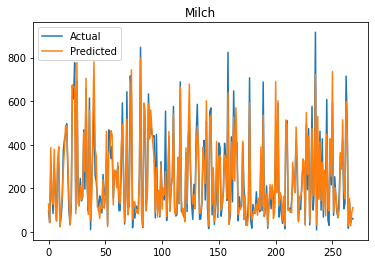

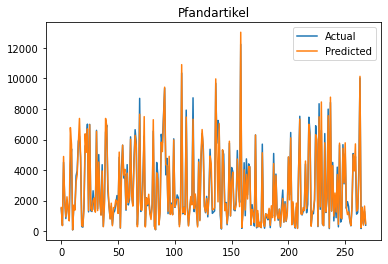

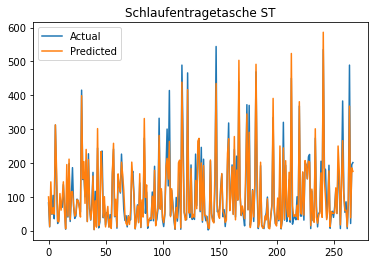

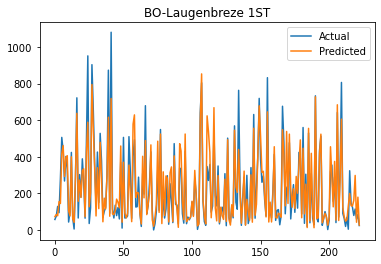

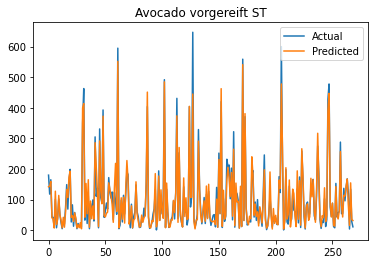

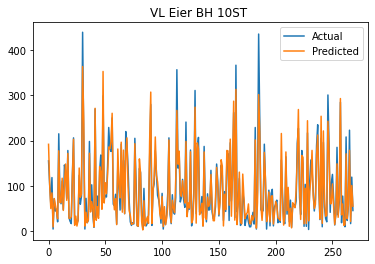

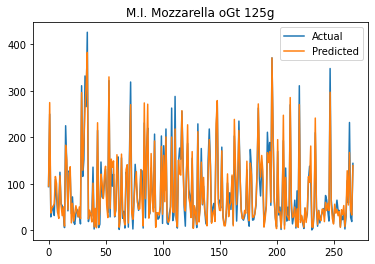

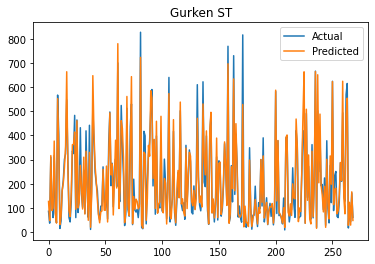

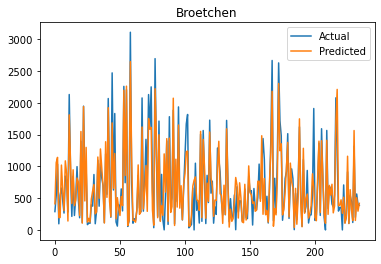

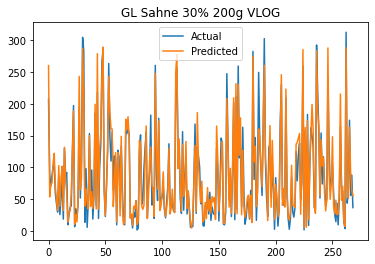

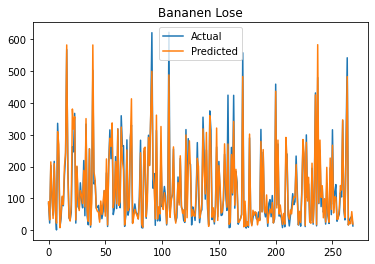

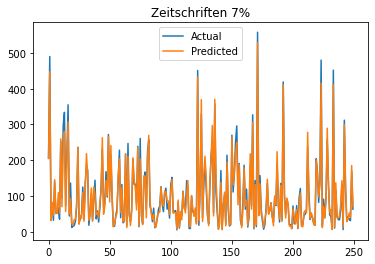

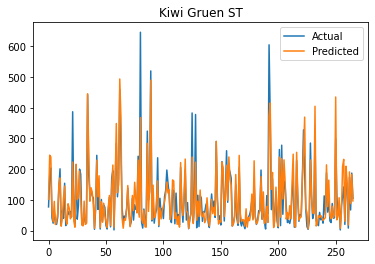

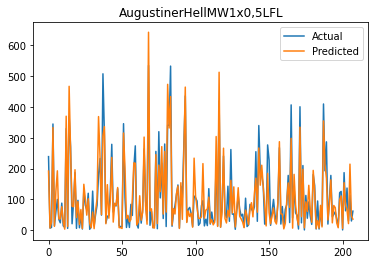

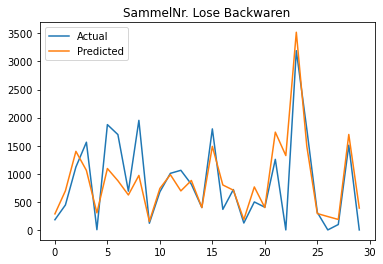

In [5]:
lasso_dict = {'score':0 , 'rmse':0, 'r2':0}
mlp_dict = {'score':0 , 'rmse':0, 'r2':0}
ada_dict = {'score':0 , 'rmse':0, 'r2':0}
rf_dict = {'score':0 , 'rmse':0, 'r2':0}
et_dict = {'score':0 , 'rmse':0, 'r2':0}

for article_name in list(df['Group'].unique()):
    # select article
    print(f"------------article : {article_name}-------------")
    article = df.loc[:,['StoreNumber', 'Month', 'Quantity', 'Day', 'Hour']][df.Group == article_name]
    article = article.groupby(['StoreNumber', 'Month', 'Day', 'Hour'])['Quantity'].sum().reset_index()

    # separate features and outcome
    x = article.drop('Quantity', axis=1)
    encoder = LabelEncoder()
    for col in x.columns:
        x[col] = encoder.fit_transform(x[col])
    y = article['Quantity']

    # # standardize features value into [0,1]
    # scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    # x = pd.DataFrame(scaler.fit_transform(x), columns=x.keys())

    # # set train data and test data
    x_train,x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)

    # apply machine learning algo
    # Lasso
    lasso = Lasso()
    lasso.fit(x_train,y_train)
    y_lasso = lasso.predict(x_test)

    # Neural Network
    mlp = MLPRegressor()
    mlp.fit(x_train,y_train)
    y_mlp = mlp.predict(x_test)

    # Adaboost
    ada = AdaBoostRegressor()
    ada.fit(x_train,y_train)
    y_ada = ada.predict(x_test)

    # Random forest
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_rf = rf.predict(x_test)

    # Extra tree
    et = ExtraTreesRegressor()
    et.fit(x_train,y_train)
    y_et = et.predict(x_test)

    # show results
    # Lasso
    print(f'Lasso score={lasso.score(x_train, y_train)}')
    print(f'Lasso rmse={mse(y_test, y_lasso, squared=False)}')
    print(f'Lasso r2={r2(y_test, y_lasso)}')
    lasso_dict['score'] += lasso.score(x_train, y_train)
    lasso_dict['rmse'] += mse(y_test, y_lasso, squared=False)
    lasso_dict['r2'] += r2(y_test, y_lasso)

    # MLP
    print(f'MLP score={mlp.score(x_train, y_train)}')
    print(f'MLP rmse={mse(y_test, y_mlp, squared=False)}')
    print(f'MLP r2={r2(y_test, y_mlp)}')
    mlp_dict['score'] += mlp.score(x_train, y_train)
    mlp_dict['rmse'] += mse(y_test, y_mlp, squared=False)
    mlp_dict['r2'] += r2(y_test, y_mlp)

    # Adaboost
    print(f'Adaboost score={ada.score(x_train, y_train)}')
    print(f'Adaboost rmse={mse(y_test, y_ada, squared=False)}')
    print(f'Adaboost r2={r2(y_test, y_ada)}')
    ada_dict['score'] += ada.score(x_train, y_train)
    ada_dict['rmse'] += mse(y_test, y_ada, squared=False)
    ada_dict['r2'] += r2(y_test, y_ada)
    
    # Random forest
    print(f'Random forest score={rf.score(x_train, y_train)}')
    print(f'Random forest rmse={mse(y_test, y_rf, squared=False)}')
    print(f'Random forest r2={r2(y_test, y_rf)}')
    rf_dict['score'] += rf.score(x_train, y_train)
    rf_dict['rmse'] += mse(y_test, y_rf, squared=False)
    rf_dict['r2'] += r2(y_test, y_rf)

    # Extra tree
    print(f'Extra tree score={et.score(x_train, y_train)}')
    print(f'Extra tree rmse={mse(y_test, y_et, squared=False)}')
    print(f'Extra tree r2={r2(y_test, y_et)}')
    et_dict['score'] += et.score(x_train, y_train)
    et_dict['rmse'] += mse(y_test, y_et, squared=False)
    et_dict['r2'] += r2(y_test, y_et)
    
    # plot
    data = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf}).reset_index().drop(columns='index')
    display(data.plot(title=f'{article_name}'))

In [6]:
# Evaluation
num_article = df.Group.nunique()
print(f'average Lasso score : {lasso_dict["score"]/num_article}')
print(f'average Lasso rmse : {lasso_dict["rmse"]/num_article}')
print(f'average Lasso r2 : {lasso_dict["r2"]/num_article}')

print(f'average MLP score : {mlp_dict["score"]/num_article}')
print(f'average MLP rmse : {mlp_dict["rmse"]/num_article}')
print(f'average MLP r2 : {mlp_dict["r2"]/num_article}')

print(f'average Adaboost score : {ada_dict["score"]/num_article}')
print(f'average Adaboost rmse : {ada_dict["rmse"]/num_article}')
print(f'average Adaboost r2 : {ada_dict["r2"]/num_article}')

print(f'average Random forest score : {rf_dict["score"]/num_article}')
print(f'average Random forest rmse : {rf_dict["rmse"]/num_article}')
print(f'average Random forest r2 : {rf_dict["r2"]/num_article}')

print(f'average Extra tree score : {et_dict["score"]/num_article}')
print(f'average Extra tree rmse : {et_dict["rmse"]/num_article}')
print(f'average Extra tree r2 : {et_dict["r2"]/num_article}')

average Lasso score : 0.46021352022006357
average Lasso rmse : 244.65309307686823
average Lasso r2 : 0.46078442909192735
average MLP score : 0.22871269541915032
average MLP rmse : 362.69618727948256
average MLP r2 : 0.20127336523021508
average Adaboost score : 0.7105346849285166
average Adaboost rmse : 205.9629680141184
average Adaboost r2 : 0.6747543816556416
average Random forest score : 0.9838136799002828
average Random forest rmse : 111.93972770978033
average Random forest r2 : 0.886623324371761
average Extra tree score : 0.9999978685965261
average Extra tree rmse : 119.39762857078125
average Extra tree r2 : 0.8716138369349735


## BO-Laugenbreze 1ST

In [7]:
article = df.loc[:,['StoreNumber', 'Quantity', 'Month', 'Day','Hour']][df.Group == 'BO-Laugenbreze 1ST']
article = article.groupby(['StoreNumber', 'Month', 'Day','Hour'])['Quantity'].sum().reset_index()
article.head()

,StoreNumber,Month,Day,Hour,Quantity
0,1001,1,0,0,66.0
1,1001,1,0,1,154.0
2,1001,1,0,2,101.0
3,1001,1,0,3,33.0
4,1001,1,1,0,467.0


In [8]:
x = article.drop('Quantity', axis=1)
encoder = LabelEncoder()
for col in x.columns:
    x[col] = encoder.fit_transform(x[col])
y = article['Quantity']

# scaler = MinMaxScaler(copy=True, feature_range=(0,1))
# x = pd.DataFrame(scaler.fit_transform(x), columns=x.keys())
x.head()

,StoreNumber,Month,Day,Hour
0,0,0,0,0
1,0,0,0,1
2,0,0,0,2
3,0,0,0,3
4,0,0,1,0


In [9]:
# x_train = x[x.Month<=0.9]
# y_train = y.iloc[:x_train.shape[0]]
# x_test = x[x.Month>0.9]
# y_test = y.iloc[x_train.shape[0]:]
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:

# Neural Network
mlp = MLPRegressor()
mlp.fit(x_train,y_train)
y_mlp = mlp.predict(x_test)

# Random forest
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_rfc = rf.predict(x_test)

# Extra tree
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
y_et = et.predict(x_test)


In [11]:
print(f'MLP score={mlp.score(x_train, y_train)}')
print(f'Random forest score={rf.score(x_train, y_train)}')
print(f'Extra tree score={et.score(x_train, y_train)}')


MLP score=0.018947379577760493
Random forest score=0.977040083347041
Extra tree score=0.9999994025297364


In [12]:
# MLP
print("MLP--------------------")
print(mse(y_test, y_mlp, squared=False))
print(r2(y_test, y_mlp))
# Random forest
print("Random forest--------------------")
print(mse(y_test, y_rfc, squared=False))
print(r2(y_test, y_rfc))
# Extra tree
print("Extra tree--------------------")
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_rfc}).reset_index().drop(columns='index')
print(mse(y_test, y_et, squared=False))
print(r2(y_test, y_et))

MLP--------------------
211.58278004922764
-0.0005933816565135697
Random forest--------------------
82.80796840544468
0.8467356148143423
Extra tree--------------------
88.888382009616
0.8234015084315361


<AxesSubplot:>

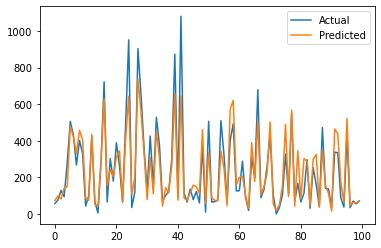

In [13]:
data.head(100).plot()

In [34]:
x_train = x[x.Month<9]
x_test = x[x.Month>=9]

In [35]:
y_train = y[:x_train.shape[0]]
y_test = y[:x_test.shape[0]]

In [36]:
# Random forest
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_rfc = rf.predict(x_test)

In [37]:
y_rfc.sum()

67623.91

In [38]:
y_test.sum()

63710.0